In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [42]:
data = pd.read_csv("data/umist_with_original_face_id_clustered.csv")

In [43]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_10296,pixel_10297,pixel_10298,pixel_10299,pixel_10300,pixel_10301,pixel_10302,pixel_10303,label,cluster_id
0,234.0,234.0,234.0,234.0,234.0,234.0,234.0,234.0,234.0,233.0,...,193.0,192.0,192.0,192.0,192.0,191.0,190.0,191.0,0,12
1,234.0,234.0,234.0,234.0,234.0,234.0,234.0,234.0,234.0,234.0,...,191.0,186.0,183.0,179.0,174.0,169.0,165.0,164.0,0,12
2,234.0,234.0,234.0,234.0,233.0,230.0,225.0,109.0,85.0,84.0,...,168.0,164.0,157.0,152.0,151.0,148.0,145.0,145.0,0,12
3,236.0,236.0,236.0,236.0,236.0,236.0,237.0,236.0,236.0,235.0,...,130.0,166.0,182.0,190.0,192.0,192.0,192.0,193.0,0,13
4,234.0,234.0,236.0,235.0,234.0,235.0,234.0,234.0,236.0,235.0,...,129.0,131.0,171.0,177.0,187.0,192.0,191.0,191.0,0,13


In [44]:
original_labels = data['label']
clustered_labels = data['cluster_id']

Distribution of clustered labels
Counter({17: 45, 11: 39, 13: 29, 16: 28, 19: 24, 10: 23, 7: 23, 18: 21, 1: 20, 14: 20, 3: 20, 8: 16, 12: 15, 4: 15, 15: 14, 20: 12, 2: 12, 9: 10, 5: 7, 6: 7})


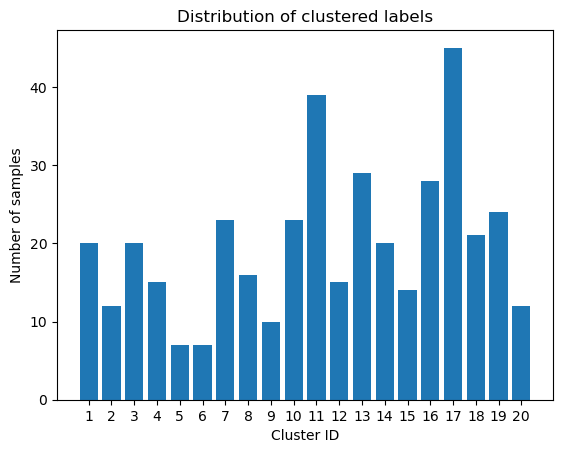

In [45]:
print("Distribution of clustered labels")
print(Counter(clustered_labels))

plt.bar(Counter(clustered_labels).keys(), Counter(clustered_labels).values())
plt.xlabel("Cluster ID")
plt.ylabel("Number of samples")
plt.title("Distribution of clustered labels")
if 0 not in Counter(clustered_labels).keys():
    plt.xticks(np.arange(1, max(Counter(clustered_labels).keys())+1, 1))
else:
    plt.xticks(np.arange(0, max(Counter(clustered_labels).keys())+1, 1))
plt.show()


In [46]:
# Plot pie chart the distribution of original labels in each cluster

unique_clusters = np.unique(clustered_labels)
unique_original_labels = np.unique(original_labels)

In [47]:
cluster_id = np.array(data['cluster_id'])
original_label = np.array(data['label'])

In [48]:
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 15 else ''

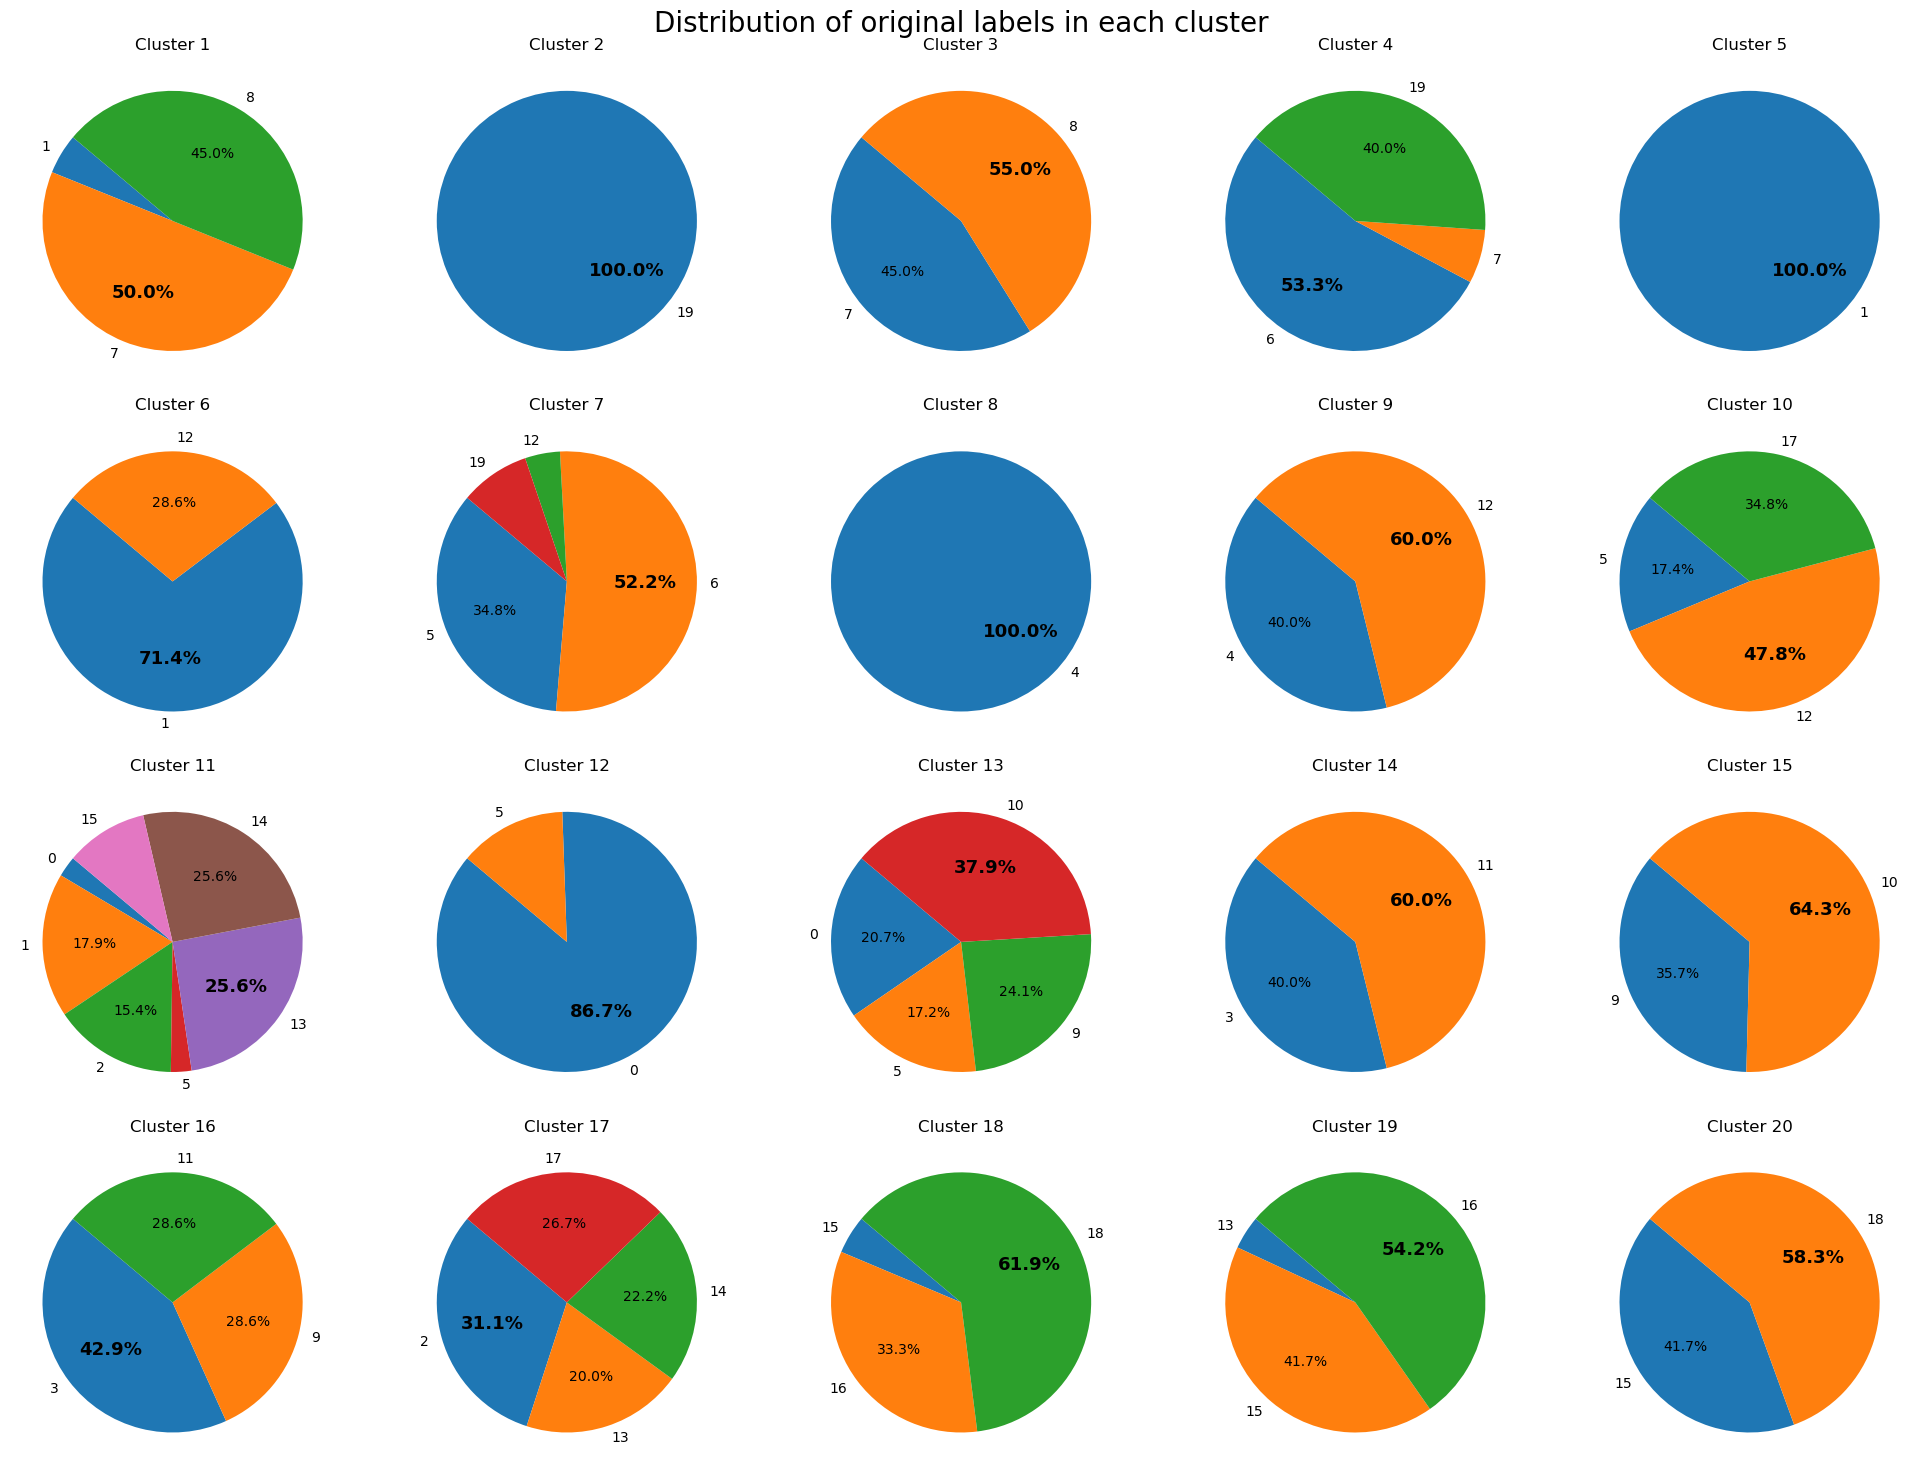

In [49]:
df = pd.DataFrame({'cluster_id': cluster_id, 'original_label': original_label})

num_clusters = len(unique_clusters)
fig, axes = plt.subplots(4, 5, figsize=(20, 15), subplot_kw=dict(aspect="equal"))

axes = axes.flatten()

for i, cluster in enumerate(unique_clusters):
    cluster_data = df[df['cluster_id'] == cluster]
    cluster_original_labels = cluster_data['original_label']
    
    # Count occurrences of each original label
    cluster_original_labels_count = Counter(cluster_original_labels)
    labels = list(cluster_original_labels_count.keys())
    sizes = list(cluster_original_labels_count.values())

    # Plot the pie chart
    wedges, texts, autotexts = axes[i].pie(sizes, labels=labels, autopct=lambda pct: autopct_format(pct), startangle=140)

    # Bold the largest percentage
    largest_pct_index = np.argmax(sizes)  # Find the index of the largest slice
    autotexts[largest_pct_index].set_fontweight('bold')
    # Increase font size on the largest slice
    autotexts[largest_pct_index].set_fontsize(13)

    axes[i].set_title(f"Cluster {cluster}")

# Hide unused subplots if the number of clusters is less than 20
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Distribution of original labels in each cluster", fontsize=20)
plt.tight_layout()
plt.show()